## Observations and Insights 

In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [7]:
# Display the data table for preview
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [8]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [9]:
# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results, on= "Mouse ID", how="left")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [29]:
# Checking the number of mice.
total_mice = merged_df["Mouse ID"].nunique()
#nunique calculates the dustubct values in a column
print(total_mice)

249


In [56]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
drop_dup_id = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
drop_dup_id

array(['g989'], dtype=object)

In [94]:
# Optional: Get all the data for the duplicate mouse ID. 
deduped_df =merged_df[merged_df["Mouse ID"].isin(drop_dup_id)==True]
deduped_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [95]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
deduped_df =merged_df.drop_duplicates(subset=["Mouse ID","Timepoint"])
drop_deduped_df =merged_df[merged_df["Mouse ID"].isin(drop_dup_id)==False]
drop_deduped_df.head()
# deduped_df =merged_df[merged_df["Mouse ID"].isin(drop_dup_id)==False]
# sort_by_time = deduped_df.sort_values("Timepoint", ascending= True)
# sort_by_time.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [96]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice= drop_deduped_df["Mouse ID"].nunique()
cleaned_mice

248

## Summary Statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
r_avg = drop_deduped_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
r_med = drop_deduped_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
r_var =drop_deduped_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
r_sd = drop_deduped_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
r_sem = drop_deduped_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = pd.DataFrame({"Mean":r_avg,"Median":r_med,"Variance":r_var,"Standard Deviation":r_sd,"SEM":r_sem})
summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [100]:
# This method produces everything in a single groupby function
summary2= drop_deduped_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

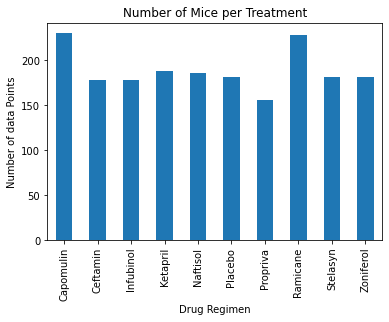

In [228]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_v_regimen = deduped_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_v_regimen.plot.bar()

plt.xlabel("Drug Regimen")
plt.ylabel("Number of data Points")
plt.title("Number of Mice per Treatment")

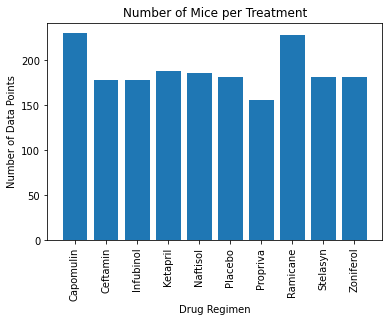

In [234]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_v_regimen_list = deduped_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
drug_r = np.arange(len(mice_v_regimen))


tick_locations = [value for value in drug_r]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.bar(drug_r, mice_v_regimen_list)
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.savefig("../Images/mat_mice_per_treat.png", bbox_inches = "tight")


In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = merged_df.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(gender.size())
gender_df

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# gender_df
mouse_gender

,Total Count,Percentage
Sex,,
Female,124,49.799197
Male,125,50.200803


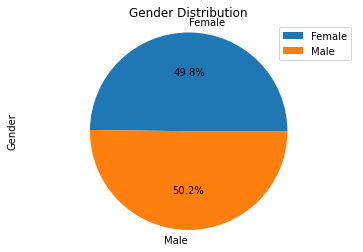

In [79]:
#  Generate a pie plot showing the distribution of female versus male mice us
plot = mouse_gender.plot.pie(y="Total Count", autopct="%1.1f%%")

plt.ylabel("Gender")
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()

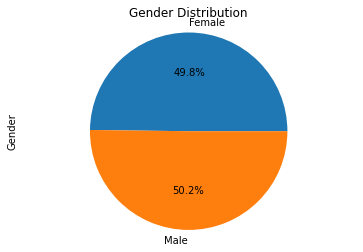

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
sizes = mouse_gender["Percentage"] 
plt.pie(sizes, labels=labels,autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel('Gender')
plt.title("Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [219]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = drop_deduped_df.loc[drop_deduped_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = drop_deduped_df.loc[drop_deduped_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = drop_deduped_df.loc[drop_deduped_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df =drop_deduped_df.loc[drop_deduped_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
cap_timepoint = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
cap_vol = pd.DataFrame(cap_timepoint)

ram_timepoint = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
ram_vol = pd.DataFrame(ram_timepoint)

inf_timepoint = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
inf_vol = pd.DataFrame(inf_timepoint)

cef_timepoint = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
cef_vol = pd.DataFrame(cef_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_merged = pd.merge(cap_vol,merged_df,on=("Mouse ID","Timepoint"),how="left")
cap_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [220]:
ram_merged = pd.merge(ram_vol,merged_df,on=("Mouse ID","Timepoint"),how="left")
ram_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [221]:
inf_merged = pd.merge(inf_vol,merged_df,on=("Mouse ID","Timepoint"),how="left")
inf_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [222]:
cef_merged = pd.merge(cef_vol,merged_df,on=("Mouse ID","Timepoint"),how="left")
cef_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [224]:
# # Put treatments into a list for for loop (and later for plot labels)
# treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# # Create empty list to fill with tumor vol data (for plotting)
# tumor_vol_list = []
# # Calculate the IQR and quantitatively determine if there are any potential outliers.
# for drug in treatment_list:
#     # Locate the rows which contain mice on each drug and get the tumor volumes
#     final_tumor_vol = cef_merged.loc[cef_merged["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
#     # add subset
#     tumor_vol_list.append(final_tumor_vol)
#     # Determine outliers using upper and lower bounds
#     quartiles = final_tumor_vol.quantile([.25,.5,.75])
#     lowerq = quartiles[0.25]
#     upperq = quartiles[0.75]
#     iqr = upperq-lowerq
#     lower_bound = lowerq - (1.5*iqr)
#     upper_bound = upperq + (1.5*iqr)
#     outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
#     print(f "potential outliers for" '': {outliers}")

In [144]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cef_volume = cef_merged["Tumor Volume (mm3)"]
quartiles = cef_volume.quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    
   # Locate the rows which contain mice on each drug and get the tumor volumes
outliers = cef_volume.loc[(cef_volume < lower_bound) | (cef_volume > upper_bound)]
print(f"Ceftamin's potential outliers: {outliers}")

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [201]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_volume = cap_merged["Tumor Volume (mm3)"]
quartiles = cap_volume.quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
outliers = cap_volume.loc[(cap_volume < lower_bound) | (cap_volume > upper_bound)]
print(f"Capumilin's potential outliers: {outliers}")

Capumilin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [202]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
inf_volume = inf_merged["Tumor Volume (mm3)"]
quartiles = inf_volume.quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
outliers = inf_volume.loc[(inf_volume < lower_bound) | (inf_volume > upper_bound)]
print(f"Infubinol's potential outliers: {outliers}")

Infubinol's potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [181]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ram_volume = ram_merged["Tumor Volume (mm3)"]
quartiles = ram_volume.quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
outliers = ram_volume.loc[(ram_volume < lower_bound) | (ram_volume > upper_bound)]
print(f"Ramicane's potential outliers: {outliers}")

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


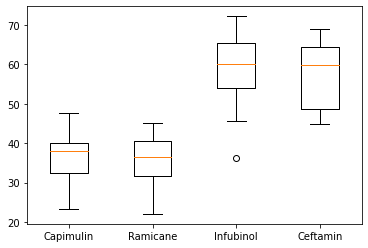

In [196]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Volume_list = [cap_volume,ram_volume,inf_volume,cef_volume]
plt.boxplot(Volume_list,labels=["Capimulin",'Ramicane','Infubinol',"Ceftamin"])
plt.show()

## Line and Scatter Plots

In [184]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mouses = drop_deduped_df.loc[drop_deduped_df["Drug Regimen"] =="Capomulin"]
l509_df = cap_mouses.loc[cap_mouses["Mouse ID"] =="l509"]
l509_df.head()                   

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

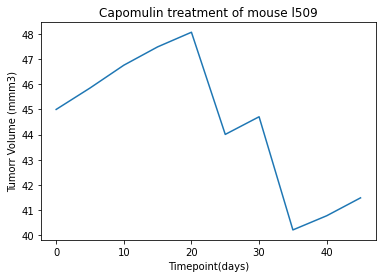

In [150]:
plt.plot(l509_df["Timepoint"],l509_df["Tumor Volume (mm3)"])
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumorr Volume (mmm3)')
plt.title("Capomulin treatment of mouse l509")

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

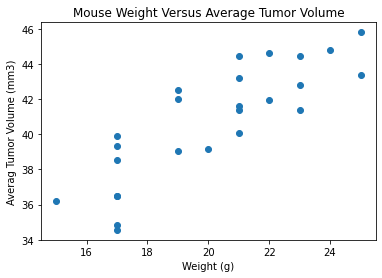

In [155]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mouses_avg = cap_mouses.groupby(["Mouse ID"]).mean()
plt.scatter(cap_mouses_avg['Weight (g)'],cap_mouses_avg['Tumor Volume (mm3)'])
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [162]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cor = round(st.pearsonr(cap_mouses_avg["Weight (g)"], cap_mouses_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {cor}")

The correlation between mouse weight and average tumor volume is 0.84


In [165]:
x_values = cap_mouses_avg['Weight (g)']
y_values = cap_mouses_avg['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134
y = 0.95x + 21.55


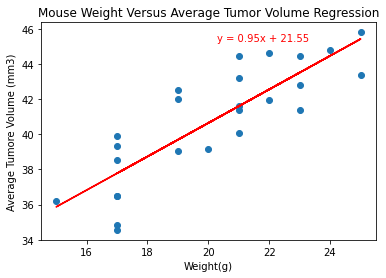

In [179]:
fig1, ax1 = plt.subplots()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Mouse Weight Versus Average Tumor Volume Regression')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
plt.show()

## Observations


1) Of the four drugs isolated for analysis, Ramicane and Capomulin appeared to be the most effective in restraining tumor growth. 

2) However, it is important to note that the sample size of mice being treated with these two drugs are also much larger compared to other drugs.

3) Analysis also indicates that heaver mice also tend to possess larger tumors.